# Task  2 - Iris Dataset

## Unsupervised Learning - KMeans Clustering
The Sparks Foundation

**Author : Abir Chatterjee**

We are trying to study with the help of Unsupervised Learning method the Iris Flower Dataset that we've been given.
Here, we shall try to find clusters with the help of KMeans.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
# Reading the dataset
data=sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We see that we have a total of 150 datas available, 50 for each different kind of species. The species are Sentosa,versicolour and verginica.

The available attributes on the basis of which we are expected to classify are :
1. sepal length
2. sepal width
3. petal length & lastly,
4. petal width

Before we move ahead, let us have an initial  EDA and visualisation of our data

In [3]:
data_stat = pd.DataFrame(data.describe()).reset_index()
data_stat

,index,sepal_length,sepal_width,petal_length,petal_width
0,count,150.000000,150.000000,150.000000,150.000000
1,mean,5.843333,3.057333,3.758000,1.199333
2,std,0.828066,0.435866,1.765298,0.762238
3,min,4.300000,2.000000,1.000000,0.100000
4,25%,5.100000,2.800000,1.600000,0.300000
5,50%,5.800000,3.000000,4.350000,1.300000
6,75%,6.400000,3.300000,5.100000,1.800000
7,max,7.900000,4.400000,6.900000,2.500000


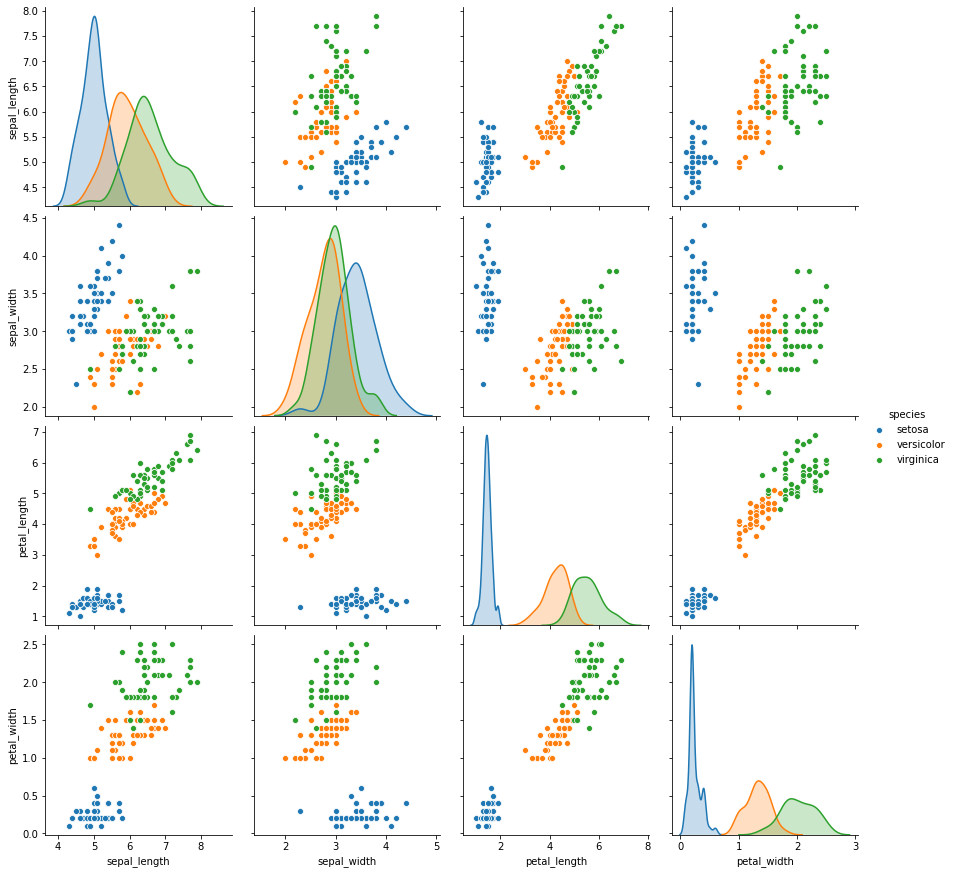

In [4]:
sns.pairplot(data,hue="species",height=3);
plt.show()

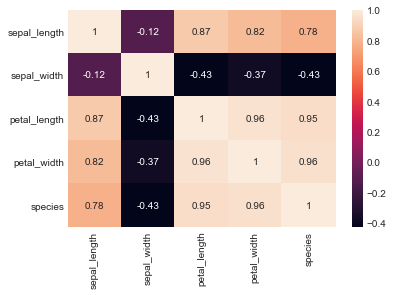

In [14]:
sns.heatmap(data.corr(),annot= True);

Using the Label Encoder to convert all my Species categories from object to numeric type. This will change all the categories into 0,1,2 and so on.

In [5]:
labelEncoder = LabelEncoder()
labelEncoder.fit(data['species'])
data['species'] = labelEncoder.transform(data['species'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We remove the Species column from our clustering process. Well will let the algorithm give us the clusters.

In [7]:
#For cluster analysis we need sepal_length, sepal_width, petal_length and petal width these for variables
# so we will save these variables in X
X = data.iloc[:,[0,1,2,3]].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### The Elbow Method

The important aspect in K means is to try and find the ideal number of clusters that can be made using the data at hand. One convinent method is by using the **Elbow Method**. Looking at the slope of the curve, we find the optimal number of clusters to go with.

1 : 1.9440683605553906
2 : 0.8555777695266533
3 : 0.6480304904934434
4 : 0.5573847727333312
5 : 0.5089665559584213
6 : 0.46638775718623643
7 : 0.4381604386578758
8 : 0.41086768314893807
9 : 0.3946354557276724
10 : 0.3809608269303243


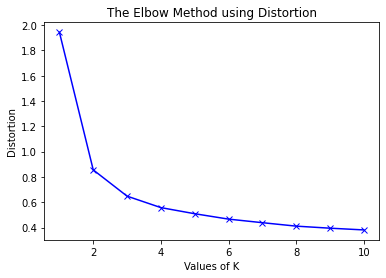

In [8]:
distortions = [] #It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.[Measure of Hetrogeneity]
inertias = [] # It is the sum of squared distances of samples to their closest cluster center.[Measure of Homogenity]
mapping1 = {} 
mapping2 = {} 
K = range(1,11) 


#Based on Distortion  
for k in K: 
    #Building and fitting the model 
    #i=1
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
    
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

1 : 681.3705999999996
2 : 152.34795176035797
3 : 78.851441426146
4 : 57.22847321428572
5 : 46.46117267267268
6 : 39.05497786747789
7 : 34.46949589883803
8 : 30.064593073593088
9 : 27.861741540115133
10 : 25.96590820678179


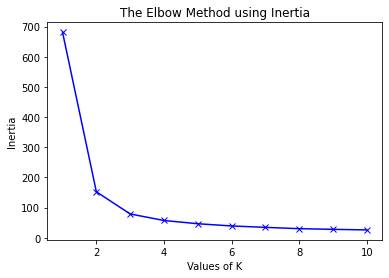

In [9]:
#Based on Inertia
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
    

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

Hence, it is clear from both the graphs that the optimal number of clusters are 3

### Implementing the K Means Clustering

In [10]:
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, 
                n_clusters=3, n_init=10,random_state=0, tol=0.0001, verbose=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [11]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

Lastly, we represent the clusters and see their visualisation with their respective centroids.

Text(0.5, 1.0, 'clusters with their centroids')

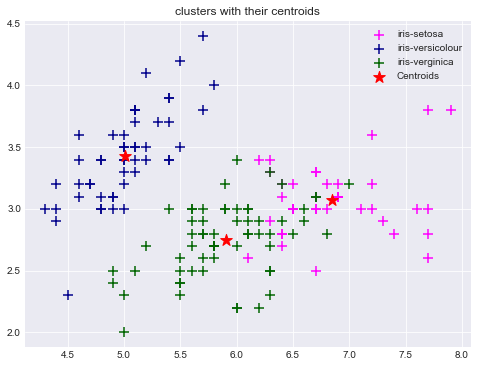

In [12]:
#Representing the clusters for visualization
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],
           s=100, marker='+',c='magenta',label='iris-setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],
           s=100, marker='+',c='darkblue',label='iris-versicolour')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],
           s=100, marker='+',c='darkgreen',label='iris-verginica')

#Plotting the respective centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s=150, marker='*', c='red', label='Centroids')

plt.legend()
plt.title('clusters with their centroids')

This concludes our Task 2.